In [13]:
H0km = 67.6
ΩΛ = 0.69
Ωm = 0.31


In [14]:
import cosmolopy.magnitudes as cm
import cosmolopy.distance as cd

cosmo = {'omega_M_0' : 0.31, 'omega_lambda_0' : 0.69, 
         'h' : 0.676, 'omega_k_0': 0}

data2 = []

z = 0.1
pc2ly = 3.261564
while z < 10:
    dL = cd.luminosity_distance(z, **cosmo)  # * pc2ly
    dm = cm.distance_modulus(z, **cosmo)
    
    data2.append([z, dL, dm])
    
    z += 0.1

In [15]:
import math
data = []

z = 0.1
pc2ly = 3.261564
while z < 10:
    dL = 299792/70 * (1+z) * math.log(1+z) #  * pc2ly
    dm = 5 * math.log10(dL) + 25
    
    data.append([z, dL, dm])
    
    z += 0.1

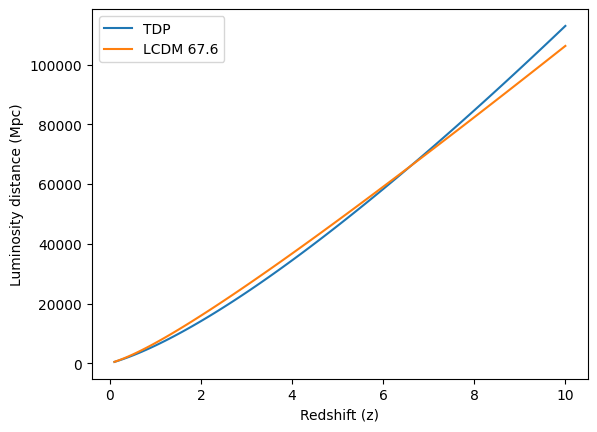

In [17]:
import matplotlib.pyplot as plt

dataz = [row[0] for row in data] 
datad1 = [row[1] for row in data] 
datad2 = [row[1] for row in data2] 
    
plt.plot(dataz, datad1, label = "TDP")
plt.plot(dataz, datad2, label = "LCDM 67.6")

plt.xlabel("Redshift (z)")
plt.ylabel("Luminosity distance (Mpc)")
plt.legend()

plt.savefig('lcdm676tdpr.png',  bbox_inches='tight')
plt.show()

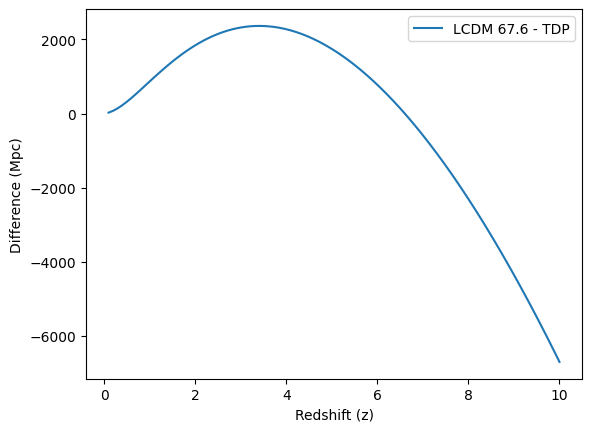

In [16]:
import matplotlib.pyplot as plt

dataz = [row[0] for row in data] 
datad = []
for i in range(len(data)):
    datad.append(data2[i][1] - data[i][1])
        
plt.plot(dataz, datad, label = "LCDM 67.6 - TDP")

plt.xlabel("Redshift (z)")
plt.ylabel("Difference (Mpc)")
#plt.ylabel("Luminosity distance (Mpc)")
plt.legend()

plt.savefig('lcdm676tdpr.png',  bbox_inches='tight')
plt.show()

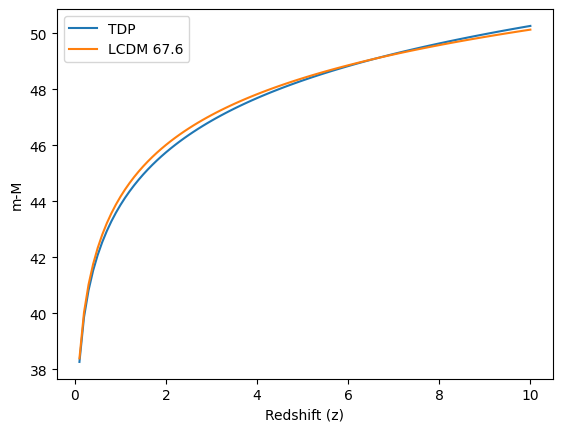

In [18]:
import matplotlib.pyplot as plt

dataz = [row[0] for row in data] 
datad1 = [row[2] for row in data] 
datad2 = [row[2] for row in data2] 
    
plt.plot(dataz, datad1, label = "TDP")
plt.plot(dataz, datad2, label = "LCDM 67.6")

plt.xlabel("Redshift (z)")
plt.ylabel("m-M")
plt.legend()

plt.savefig('lcdm676tdpr.png',  bbox_inches='tight')
plt.show()

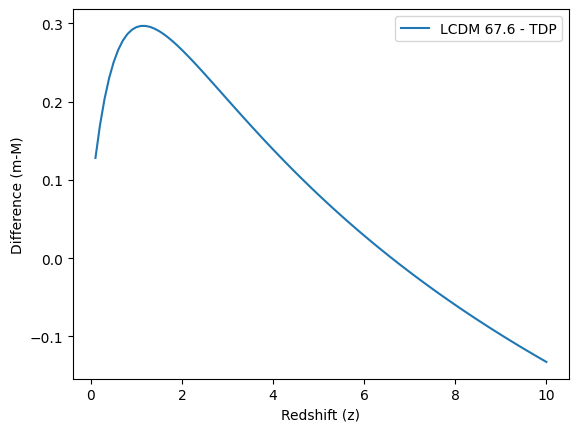

In [19]:
import matplotlib.pyplot as plt

dataz = [row[0] for row in data] 
datad = []
for i in range(len(data)):
    datad.append(data2[i][2] - data[i][2])
        
plt.plot(dataz, datad, label = "LCDM 67.6 - TDP")

plt.xlabel("Redshift (z)")
plt.ylabel("Difference (m-M)")
#plt.ylabel("Luminosity distance (Mpc)")
plt.legend()

plt.savefig('lcdm676tdpr.png',  bbox_inches='tight')
plt.show()

In [10]:
(data2[19][1] - data[19][1]) *pc2ly


6001.880470529659